In [1]:
import json
import requests
import time, glob, os
import codecs
import sys
import io
import pandas as pd

In [2]:
from eventbrite import Eventbrite
# use your own oauth_token
eventbrite = Eventbrite('VNQ5O2XTOLLXULDZAF66')

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

## RQ1 Time Mode

In [4]:
events = pd.read_csv('../data/events_berlin_all.csv')

In [5]:
events

,page,startDate,endDate,name,url,addressCountry,addressLocality,addressRegion,streetAddress,postalCode,latitude,longitude,locationName,id
0,4,2023-06-07,2023-06-07,Im Spotlight: KI-Startups und die Wissenschaft,https://www.eventbrite.com/e/im-spotlight-ki-s...,DE,Berlin,BE,Max-Urich-Straße 3,13355,52.539351,13.383695,AI Campus Berlin,630620652347
1,4,2023-06-15,2023-06-15,KlumBum 2023 - DAS FINALE,https://www.eventbrite.de/e/klumbum-2023-das-f...,DE,Berlin,BE,Revaler Straße 99,10245,52.507921,13.453509,Bar Zum schmutzigen Hobby,632238050027
2,4,2023-06-17,2023-06-18,"TOP90s: 90s Pop, Eurodance, Trash *BIRTHDAY SP...",https://www.eventbrite.com/e/top90s-90s-pop-eu...,DE,Berlin,Berlin,Revaler Straße 99,10245,52.507281,13.453979,Badehaus Szimpla,592314126497
3,4,2023-06-24,2023-06-25,Ü30 Party Berlin – die größte Ü30 Party Berlins,https://www.eventbrite.de/e/u30-party-berlin-d...,DE,Berlin,Berlin,Köpenicker Straße 16-17,10997,52.505890,13.434702,Spindler & Klatt,621062212797
4,4,2023-06-14,2023-06-14,"Mittwochs ganz ""OBEN""",https://www.eventbrite.de/e/mittwochs-ganz-obe...,DE,Berlin,BE,Große Präsidentenstraße 6-7,10178,52.523048,13.400855,Hotel Zoe by AMANO,637950405837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,9,2023-06-15,2023-06-15,Projektbesichtigung in Berlin am 15.06.2023,https://www.eventbrite.de/e/projektbesichtigun...,DE,Berlin,B,Erasmusstraße 14,10553,52.526290,13.325300,THE FUTURE IS BRIGHT,621653752107
995,9,2023-06-12,2023-06-12,dash.js face-to-face Meeting 2023,https://www.eventbrite.de/e/dashjs-face-to-fac...,DE,Berlin,Berlin,Kaiserin-Augusta-Allee 31,10589,52.526000,13.314488,Fraunhofer FOKUS,597581391027
996,9,2023-06-15,2023-06-15,Elevator Pitch Workshop,https://www.eventbrite.de/e/elevator-pitch-wor...,DE,Berlin,BE,Luxemburger Strasse 20a,13353,52.543498,13.351437,Berliner Hochschule für Technik (BHT),648113193007
997,9,2023-06-27,2023-06-28,Awin ThinkTank DACH 2023,https://www.eventbrite.de/e/awin-thinktank-dac...,DE,Berlin,BE,Wohlrabedamm 7,13629,52.531925,13.277983,TEC Event Campus,469801427717


In [6]:
events.url.nunique()

998

In [7]:
event = eventbrite.get_event('537155806477')

In [8]:
event_detail = {}
for e in events.id:
    event_detail[e] = eventbrite.get_event(e)
    print(e)

630620652347
632238050027
592314126497
621062212797
637950405837
640146965807
630106895687
629598926337
498641408877
632713241337
541193944657
482995140467
535788667327
634540095507
460714097267
633846681487
644036098307
606688520697
595221181577
411049629507
649403171367
636488132137
635369365877
633337859587
637124876657
638623579317
635852641367
639186081777
632654565837
638013614897
634598961577
576328803967
607079660607
634748869957
632265100937
635968869007
632707584417
616300329877
639406922317
544514556697
632372381817
645950073057
597577298787
645382986887
602686701147
637362647837
590071398437
599627581237
637989312207
444526128617
645842140227
480398403557
491495063967
633166727727
625538260777
600690961837
640106173797
624300147547
602307406667
641207517947
643761165977
490947135097
637350080247
648988591347
564418881067
498642050797
600798924757
646841138257
640178098927
619959444387
632339704077
625141975477
632608086817
512903045817
634556013117
491695844507
607442265167

In [9]:
print(len(event_detail))

998


Next, dictionary -> dataframe

In [10]:
data = pd.DataFrame.from_dict(event_detail, orient='index')

In [12]:
data_final = data[data.name.notna()]

In [13]:
data_final.reset_index(inplace=True)

In [15]:
data_final.to_csv('../data/data_final.csv', index=False)

# RQ

Finally, we get 979 events data. Look at the tabel in detail, what we need is:<br>
RQ1:time<br>
RQ2:category, location <br>
RQ3:message, location

In [16]:
# data_final = pd.read_csv('../data/data_final.csv')
# events = pd.read_csv('../data/events_berlin_all.csv')

In [17]:
# data_final = data_final.astype({'category_id': "int32"})
# data_final = data_final.astype({'category_id': "string"})

In [18]:
events['startDate'] = pd.to_datetime(events['startDate'])

In [19]:
events.set_index(['startDate'],inplace=True)

In [20]:
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr
# https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy

In [21]:
eventplot = events.resample('H').agg(['count']) 
eventplot

,page,endDate,name,url,addressCountry,addressLocality,addressRegion,streetAddress,postalCode,latitude,longitude,locationName,id
,count,count,count,count,count,count,count,count,count,count,count,count,count
startDate,,,,,,,,,,,,,
2023-06-06 00:00:00,27,27,27,27,27,27,27,27,26,27,27,27,27
2023-06-06 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-06 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-06 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-06 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-11-15 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data

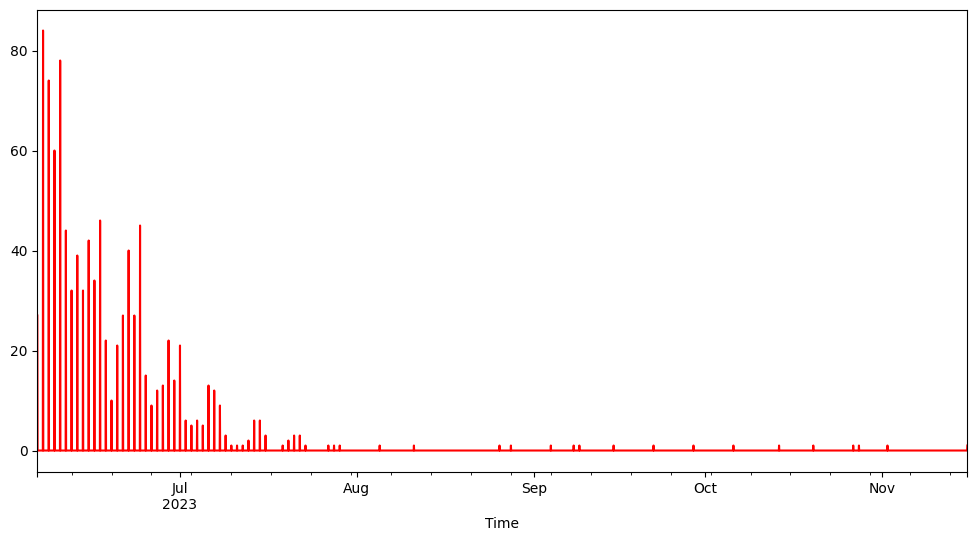

In [23]:
eventplot.plot(y=('id', 'count'), use_index=True, figsize=(12,6), legend=False, 
               xlabel='Time', kind='line', color='red')
plt.savefig('../img/time_mode.png')
plt.show()

RQ2: different color for category

In [24]:
categories = eventbrite.get_categories()

In [29]:
category = {}
for c in categories['categories']:
    category[c['id']] = c['name']

In [30]:
category[None] = 'None'

In [31]:
print(category)

{'103': 'Music', '101': 'Business & Professional', '110': 'Food & Drink', '113': 'Community & Culture', '105': 'Performing & Visual Arts', '104': 'Film, Media & Entertainment', '108': 'Sports & Fitness', '107': 'Health & Wellness', '102': 'Science & Technology', '109': 'Travel & Outdoor', '111': 'Charity & Causes', '114': 'Religion & Spirituality', '115': 'Family & Education', '116': 'Seasonal & Holiday', '112': 'Government & Politics', '106': 'Fashion & Beauty', '117': 'Home & Lifestyle', '118': 'Auto, Boat & Air', '119': 'Hobbies & Special Interest', '199': 'Other', '120': 'School Activities', None: 'None'}


In [32]:
data_final['category'] = data_final['category_id'].apply(lambda c: category[c])

/var/folders/vm/ndr3m0t93q1_hh106zs5lryc0000gn/T/ipykernel_19503/1470625489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['category'] = data_final['category_id'].apply(lambda c: category[c])


In [34]:
data_final.head()

,index,name,description,url,start,end,organization_id,created,changed,published,...,id,resource_uri,is_externally_ticketed,logo,status_code,error_description,error,series_id,vanity_url,category
0,630620652347,{'text': 'Im Spotlight: KI-Startups und die Wi...,{'text': 'Deutschland hat exzellente KI-Forsch...,https://www.eventbrite.com/e/im-spotlight-ki-s...,"{'timezone': 'Europe/Berlin', 'local': '2023-0...","{'timezone': 'Europe/Berlin', 'local': '2023-0...",749685659373,2023-05-04T07:55:38Z,2023-06-08T08:38:36Z,2023-05-04T08:06:18Z,...,630620652347,https://www.eventbriteapi.com/v3/events/630620...,False,"{'crop_mask': {'top_left': {'x': 0, 'y': 0}, '...",NaN,NaN,NaN,NaN,NaN,Science & Technology
1,632238050027,"{'text': 'KlumBum 2023 - DAS FINALE', 'html': ...",{'text': 'GNTM 2023 - Kommentiert und gehostet...,https://www.eventbrite.de/e/klumbum-2023-das-f...,"{'timezone': 'Europe/Berlin', 'local': '2023-0...","{'timezone': 'Europe/Berlin', 'local': '2023-0...",686982971633,2023-05-07T10:47:29Z,2023-06-18T08:09:38Z,2023-05-07T10:49:00Z,...,632238050027,https://www.eventbriteapi.com/v3/events/632238...,False,"{'crop_mask': {'top_left': {'x': 0, 'y': 14}, ...",NaN,NaN,NaN,NaN,NaN,Fashion & Beauty
2,592314126497,"{'text': 'TOP90s: 90s Pop, Eurodance, Trash *B...",{'text': '* 90s * EURODANCE * ROCK * HIP HOP ...,https://www.eventbrite.com/e/top90s-90s-pop-eu...,"{'timezone': 'Europe/Berlin', 'local': '2023-0...","{'timezone': 'Europe/Berlin', 'local': '2023-0...",194481439731,2023-03-17T10:56:53Z,2023-06-21T07:47:49Z,2023-03-17T10:59:26Z,...,592314126497,https://www.eventbriteapi.com/v3/events/592314...,False,"{'crop_mask': {'top_left': {'x': 0, 'y': 0}, '...",NaN,NaN,NaN,NaN,NaN,Music
3,621062212797,{'text': 'Ü30 Party Berlin – die größte Ü30 Pa...,{'text': 'Ü30 Party Berlin – die größte Ü30 Pa...,https://www.eventbrite.de/e/u30-party-berlin-d...,"{'timezone': 'Europe/Berlin', 'local': '2023-0...","{'timezone': 'Europe/Berlin', 'local': '2023-0...",185100602335,2023-04-19T17:49:15Z,2023-06-24T21:05:09Z,2023-04-19T17:52:10Z,...,621062212797,https://www.eventbriteapi.com/v3/events/621062...,False,"{'crop_mask': {'top_left': {'x': 0, 'y': 14}, ...",NaN,NaN,NaN,NaN,NaN,Seasonal & Holiday
4,637950405837,"{'text': 'Mittwochs ganz ""OBEN""', 'html': 'Mit...",{'text': 'Mittwochs treffen sich die urbanen H...,https://www.eventbrite.de/e/mittwochs-ganz-obe...,"{'timezone': 'Europe/Berlin', 'local': '2023-0...","{'timezone': 'Europe/Berlin', 'local': '2023-0...",95611940163,2023-05-17T09:10:14Z,2023-06-19T07:48:20Z,2023-05-17T09:16:08Z,...,637950405837,https://www.eventbriteapi.com/v3/events/637950...,False,"{'crop_mask': {'top_left': {'x': 76, 'y': 0}, ...",NaN,NaN,NaN,NaN,NaN,Food & Drink


In [35]:
data_q2 = events[['id','latitude','longitude']]


In [36]:
data_q2.reset_index(drop=True,inplace=True)

In [37]:
data_q2

,id,latitude,longitude
0,630620652347,52.539351,13.383695
1,632238050027,52.507921,13.453509
2,592314126497,52.507281,13.453979
3,621062212797,52.505890,13.434702
4,637950405837,52.523048,13.400855
...,...,...,...
994,621653752107,52.526290,13.325300
995,597581391027,52.526000,13.314488
996,648113193007,52.543498,13.351437
997,469801427717,52.531925,13.277983


In [38]:
other = data_final[['id','category']].copy()

In [39]:
# other.rename({'index':'id'},axis='columns', inplace=True)

In [40]:
other = other.astype({'id':'int64'})

In [41]:
other.dtypes

id           int64
category    object
dtype: object

In [42]:
q2_result = data_q2.merge(other, on='id')
q2_result

,id,latitude,longitude,category
0,630620652347,52.539351,13.383695,Science & Technology
1,632238050027,52.507921,13.453509,Fashion & Beauty
2,592314126497,52.507281,13.453979,Music
3,621062212797,52.505890,13.434702,Seasonal & Holiday
4,637950405837,52.523048,13.400855,Food & Drink
...,...,...,...,...
975,621653752107,52.526290,13.325300,Business & Professional
976,597581391027,52.526000,13.314488,Science & Technology
977,648113193007,52.543498,13.351437,Business & Professional
978,469801427717,52.531925,13.277983,None


In [43]:
# q2_result.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

# q2_result.plot(kind="scatter", x="longitude", y="latitude", c="category",
#                cmap=plt.get_cmap("jet"),colorbar=True, alpha=0.4, figsize=(10,7),
# )
# plt.legend()
# plt.show()

In [44]:
# fig, ax = plt.subplots(figsize=(6, 6))

# grouped = q2_result.groupby('category')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='longitude', y='latitude', label=key, color=colors[key])
# plt.show()

In [45]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='h', 
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

<Axes: >

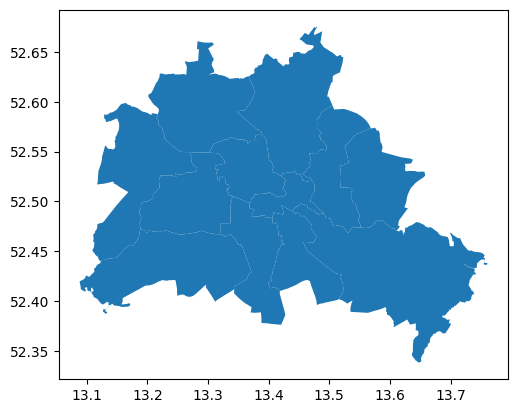

In [46]:
berlin = gpd.read_file('../data/bezirksgrenzen.shp')
berlin.plot()

<Axes: >

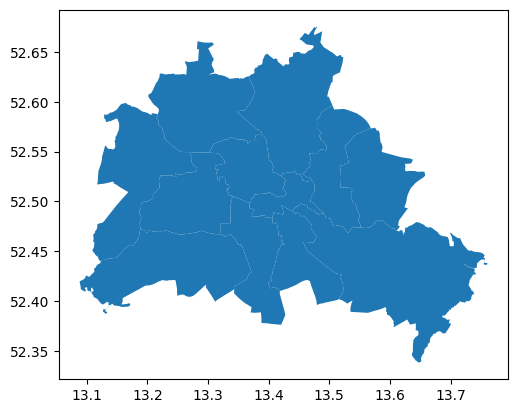

In [47]:
berlin.to_crs(epsg=4326).plot()

In [48]:
crs = {'init':'EPSG:4326'}

In [49]:
geometry = [Point(xy) for xy in zip(q2_result['longitude'], q2_result['latitude'])]
geo_df = gpd.GeoDataFrame(q2_result, 
                          crs = crs, 
                          geometry = geometry)

/Users/xuchen/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Berlin')

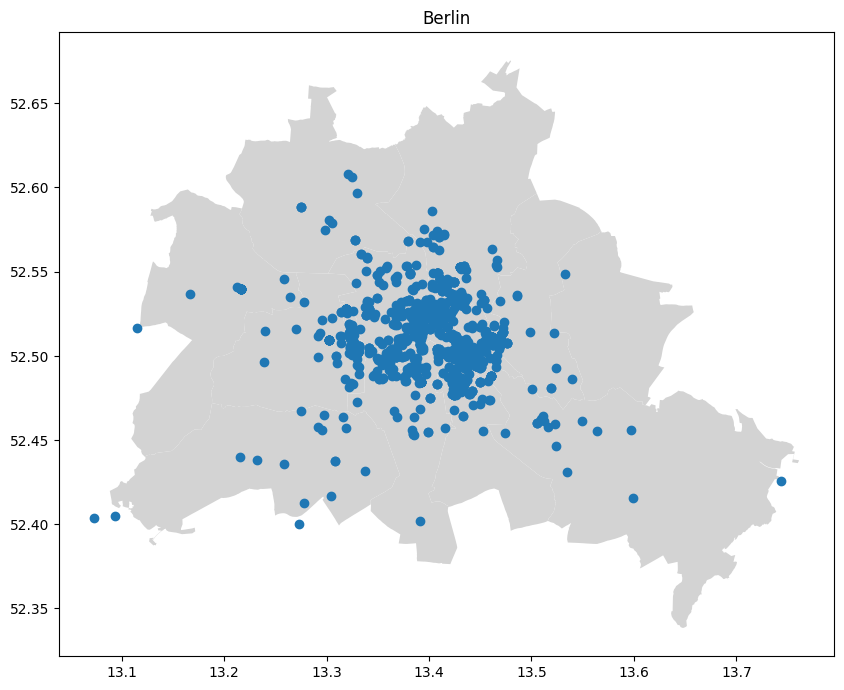

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
berlin.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Berlin')

In [ ]:
import seaborn as sns

sns.scatterplot(x='longitude', y='latitude', data=q2_result, hue='category', s=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

RQ3: different color for sentiment